In [1]:
import numpy as np
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Projection methods
Build 3D dataset

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m)*3*np.pi /2 -0.5
X = np.empty((m,3))
X[:,0] = np.cos(angles)+np.sin(angles)/2 + noise*np.random.randn(m)/2
X[:,1] = np.sin(angles)*0.7+noise*np.random.rand(m)/2
X[:,2] = X[:,0]*w1 +X[:,1]*w2 + noise*np.random.randn(m)

# PCA using SVD Decomposition

In [3]:
X_centered = X - X.mean(axis = 0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:,0]
c2 = V.T[:,1]

In [4]:
m,n = X.shape
S = np.zeros(X_centered.shape)
S[:n,:n] = np.diag(s)

In [6]:
np.allclose(X_centered, U.dot(S).dot(V))

True

In [7]:
W2 = V.T[:,:2]
X2D = X_centered.dot(W2)

In [9]:
X2D_using_svd = X2D

# PCA using Scikit-learn
with Scikit-learn, PCA is really trivial. it even takes care of mean centering

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [12]:
X2D[:5]

array([[ 1.2726919 ,  0.43830003],
       [-0.12080573, -0.41581569],
       [ 1.21991852,  0.46043666],
       [ 0.88560553, -0.31350243],
       [ 0.71077854, -0.31813195]])

In [13]:
X2D_using_svd[:5]

array([[-1.2726919 , -0.43830003],
       [ 0.12080573,  0.41581569],
       [-1.21991852, -0.46043666],
       [-0.88560553,  0.31350243],
       [-0.71077854,  0.31813195]])

Notice that running PCA multiple times on slighlty different datasets may result in different results. In general only difference is that some axes may be flipped. IN this eg, PCA using scikit-learn gives the same projection as the one fiven by the SVD approach, except both axes are flipped:

In [14]:
np.allclose(X2D, -X2D_using_svd)

True

Recover the 3D points projected on the plane (PCA 2D subspace).

In [15]:
X3D_inv = pca.inverse_transform(X2D)

Of course, there was some loss of info during the projection step, so the recovered 3D pts aren't exactly equal to the original 3D pts:

In [16]:
np.allclose(X3D_inv, X)

False

We can compute the recosntruction error

In [17]:
np.mean(np.sum(np.square(X3D_inv-X), axis=1))

0.008559459395071493

The inverse transform in the SVD approach looks like this:

In [18]:
X3D_inv_using_svd = X2D_using_svd.dot(V[:2,:])

The reconstructions from both methods are not identical b/c Scikit-learn's PCA class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction:

In [20]:
np.allclose(X3D_inv_using_svd, X3D_inv -pca.mean_)

True

The PCA object gives access to the principal components that it computed:

In [21]:
pca.components_

array([[-0.93392623, -0.30316319, -0.18940402],
       [ 0.34473666, -0.90398539, -0.2529171 ]])

Compare to the 1st two principal components computed using the SVD method

In [22]:
V[:2]

array([[ 0.93392623,  0.30316319,  0.18940402],
       [-0.34473666,  0.90398539,  0.2529171 ]])

Notice how the aces are flipped.
Now let's look at the explained variance ratio

In [23]:
pca.explained_variance_ratio_

array([ 0.84688683,  0.14368918])

The 1st dimension explains 84.7% of the variance, while the 2nd explains 14.4%.
\n 
by projecting down to 2D, we lost about 1.1% of the variance

In [24]:
1-pca.explained_variance_ratio_.sum()

0.0094239893987460022

Here is how to compute the explained variance ratio using the SVD approach (recall that s is the diagonal of the matrix S):

In [25]:
np.square(s)/np.square(s).sum()

array([ 0.84688683,  0.14368918,  0.00942399])

Next, let's generate some nice figures! 
Utility class to draw 3D arrows 

In [29]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self,(0,0),(0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    
    def draw(self, rendererfig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")):
        xs3d, ys3d, zs3d = self._verts3d
        xs,ys,zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

Express the plane as a function of x and y

In [30]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

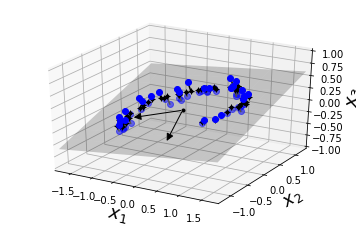

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

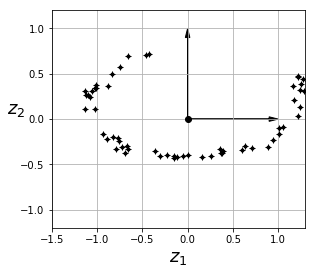

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)


# Manifold learning

In [35]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples =1000, noise =0.2, random_state=42)

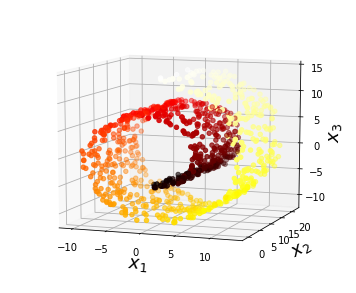

In [36]:

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

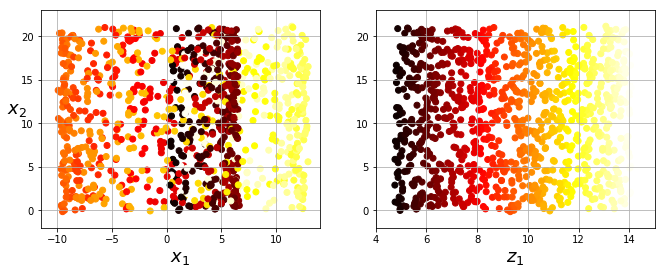

In [37]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

manifold_decision_boundary_plot1


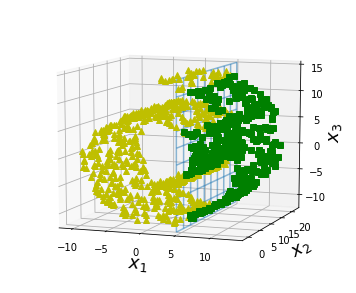

manifold_decision_boundary_plot2


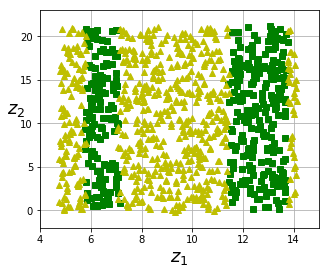

manifold_decision_boundary_plot3


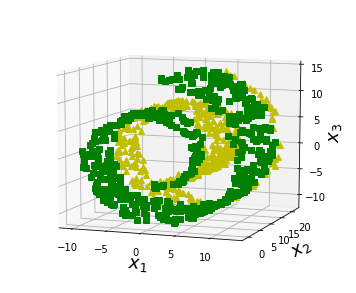

manifold_decision_boundary_plot4


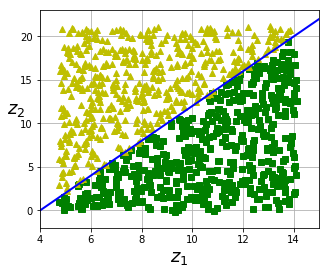

In [38]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

print("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

print("manifold_decision_boundary_plot2")
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

print("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

print("manifold_decision_boundary_plot4")
plt.show()

# PCA

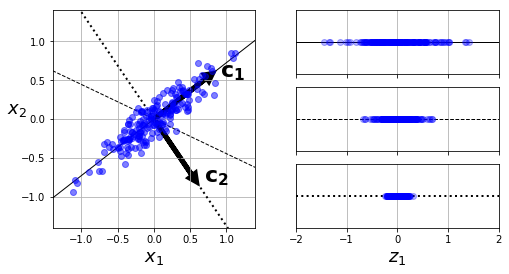

In [39]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

# MNIST Compression

In [40]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [42]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [43]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1

In [44]:
d

154

In [45]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [46]:
pca.n_components_

154

In [47]:
np.sum(pca.explained_variance_ratio_)

0.95036230847692071

In [48]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [49]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

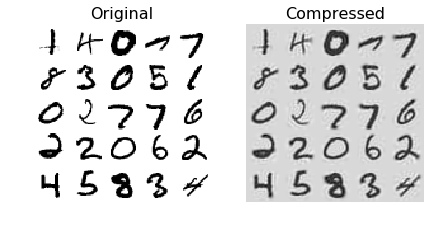

In [50]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [51]:
X_reduced_pca = X_reduced


# Incremental PCA

In [52]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end='')
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [53]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

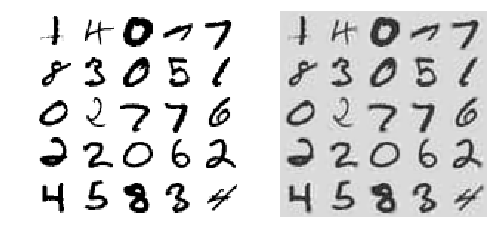

In [54]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [55]:
X_reduced_inc_pca = X_reduced

Let's compare the results of transforming MNIST using regular PCA n incremental PCA. First, the means are equal:

In [56]:
np.allclose(pca.mean_, inc_pca.mean_)

True

But the results are not exactly identical, incremental PCA gives a very good approximate solution, but it's not perfect:

In [57]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

# Using memmap()
Let's create the memmap() structure n copy the MNIST data into it. This would typically be done by a first program:

In [58]:
filename = "my_mnist.data"
m,n = X_train.shape

X_mm = np.memmap(filename, dtype = 'float32', mode = 'write', shape=(m,n))
X_mm[:]=X_train

Now deleting the memmap() object will trigger its Python finalizer, which ensures that the data is saved to disk

In [59]:
del X_mm

Next, another program would load the data and use it for training:


In [60]:
X_mm = np.memmap(filename, dtype = "float32", mode = 'readonly', shape=(m,n))

batch_size = m//n_batches
inc_pca = IncrementalPCA(n_components = 154, batch_size = batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

In [61]:
rnd_pca = PCA(n_components=154, svd_solver = "randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

# Time complexity
Let's time regular PCA n incremental PCA n randomized PCA, for various number of principal components:

In [62]:
import time

for n_components in (2,10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size = 500)
    rnd_pca = PCA(n_components= n_components, random_state =42, svd_solver = "randomize")
    
    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("  {}: {:.1f} seconds".format(pca.__class__.__name__,t2-t1))

n_components = 2
  PCA: 2.4 seconds
  IncrementalPCA: 12.8 seconds
  PCA: 0.6 seconds
n_components = 10
  PCA: 2.4 seconds
  IncrementalPCA: 13.8 seconds
  PCA: 0.5 seconds
n_components = 154
  PCA: 5.7 seconds
  IncrementalPCA: 20.1 seconds
  PCA: 0.5 seconds


Now let's compare PCA n randomized PCA for datasets of different sizes (no of instances):

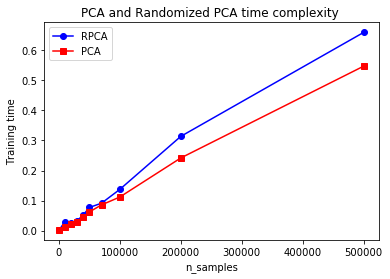

In [63]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

And now let's compare their performance on datasets 2000 instances w various no of features:

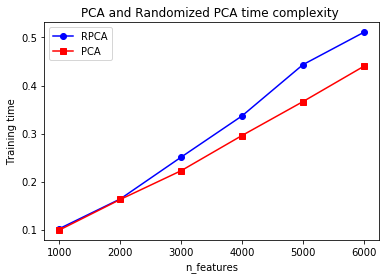

In [64]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

# Kernel PCA

In [65]:
X,t = make_swiss_roll(n_samples=1000, noise =0.2, random_state=42)

In [66]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components =2, kernel = 'rbf', gamma =0.4)
X_reduced = rbf_pca.fit_transform(X)

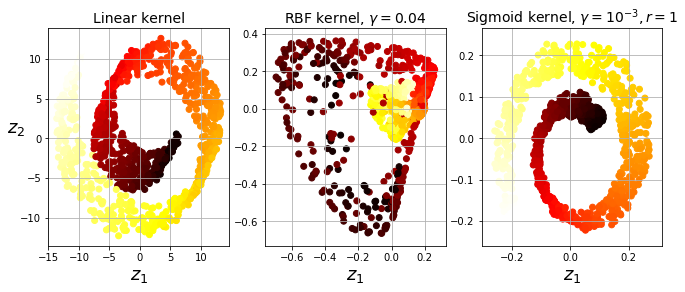

In [67]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel = "linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel = "rbf", gamma = 0.0433,fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel = "sigmoid",gamma = 0.001, coef0=1, fit_inverse_transform=True)

y = t>6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

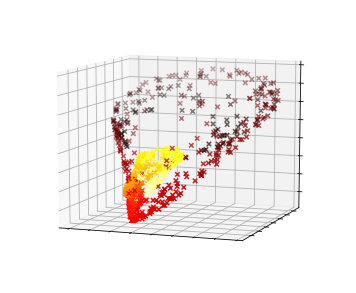

In [68]:
plt.figure(figsize=(6, 5))

X_inverse = pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])


plt.show()

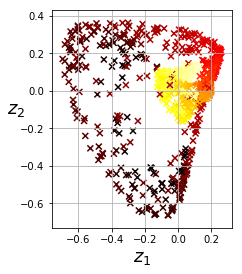

In [69]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ('kpca', KernelPCA(n_components = 2)),
        ("log_reg", LogisticRegression())
])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([ 0.03   ,  0.03222,  0.03444,  0.03667,  0.03889,  0.04111,
        0.04333,  0.04556,  0.04778,  0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [73]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma = 0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [74]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X,X_preimage)

32.786308795766146

# LLE


In [75]:
X, t = make_swiss_roll(n_samples =1000, noise =0.2, random_state=42)

In [76]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components =2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

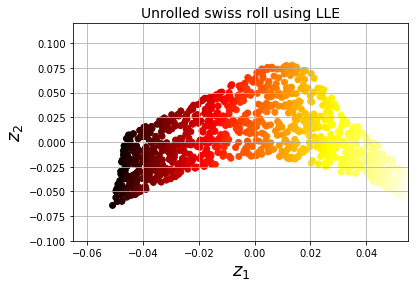

In [77]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

# MDS, Isomap and t-SNE

In [78]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state =42)
X_reduced_mds = mds.fit_transform(X)

In [79]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [80]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


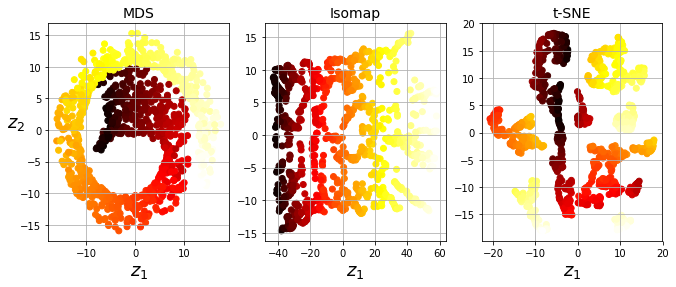

In [82]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

# Exercise 1
Load the MNIST dataset n split into a trg set n a test set (first 60000 instances for trg, and remaining 10000 for testing)

In [84]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [85]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

Train a Random Forest Classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set

In [86]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)

In [88]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [89]:
print("Training tool {:.2f}s".format(t1-t0))

Training tool 4.58s


In [91]:
from sklearn.metrics import accuracy_score

y_pred= rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.94550000000000001

Next,use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

Train a new Random Forest classifer on the reduced dataset and see how long it takes. Was training much faster?

In [93]:
rnd_clf2 = RandomForestClassifier(random_state=42)
t0= time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [94]:
print("Training took {:.2f}s".format(t1-t0))

Training took 11.25s


Oh no! Training is actually 3 times slower now! How can that be? Well, as we saw in this chapter, dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm. See figure 8-6 (the manifold_decision_boundary_plot* plots above). If you try a softmax classifier instead of a random forest classifier, you will find that training time is reduced by a factor of 3 when using PCA. Actually, we will do this in a second, but first let's check the precision of the new random forest classifier.

Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [95]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.89080000000000004

It is common for performance to drop slightly when reducing dimensionality, because we o lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance



Softmax regression:

In [96]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [97]:
print("Training tookk {:.2f}s".format(t1-t0))

Training tookk 18.37s


In [98]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92520000000000002

Okay, so softmax regression takes much longer to train on this dataset than the random forest classifier, plus it performs worse on the test set. But that's not what we are interested in right now, we want to see how much PCA can help softmax regression. Let's train the softmax regression model using the reduced dataset:

In [99]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver= 'lbfgs', random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [100]:
print("Training tool {:2f}s".format(t1-t0))

Training tool 6.936134s


In [101]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.91979999999999995

# Exercise 2
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using matplotlib. You can use a scatterplot using 10 diff colors to represent each image's target class

In [102]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

Dimensionality reduction on the full 60000 images take a very long itme, so let's only do this on a random subset of 10000 images

In [103]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
y = mnist['target'][idx]

Let's use t-SNE to reduce dimensionality down to 2D so we can plot the dataset

In [106]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

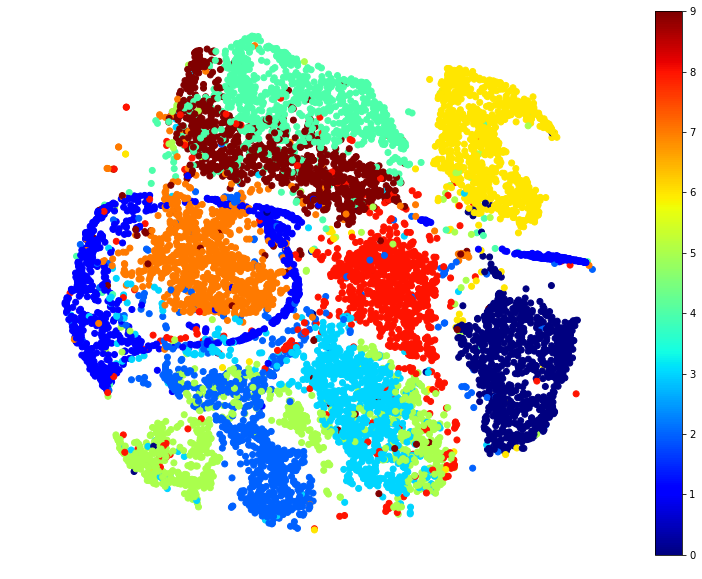

In [107]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y, cmap="jet")
plt.axis("off")
plt.colorbar()

plt.show()

Isn't this just beautiful? :) This plot tells us which numbers are easily distinguishable from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters), and it also tells us which numbers are often hard to distinguish (e.g., 4s and 9s, 5s and 3s, and so on).
Let's focus on digits 3 and 5, which seem to overlap a lot.

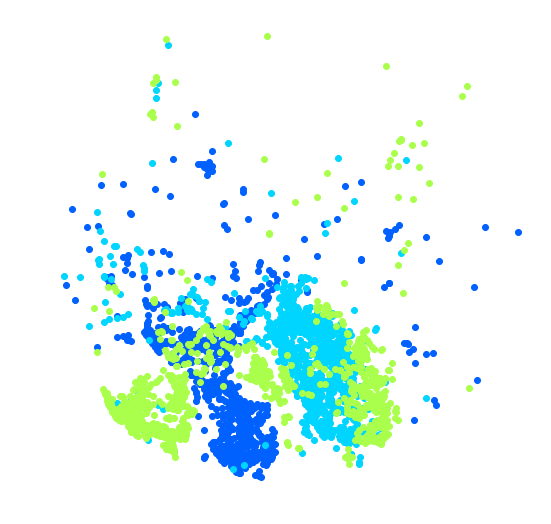

In [108]:
plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("jet")
for digit in (2,3,5):
    plt.scatter(X_reduced[y==digit,0], X_reduced[y==digit,1], c = cmap(digit/9))
plt.axis("off")
plt.show()

Let's see if we can produce a nicer image by running t-SNE on these 3 digits:

In [109]:
idx = (y==2)|(y==3)|(y==5)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

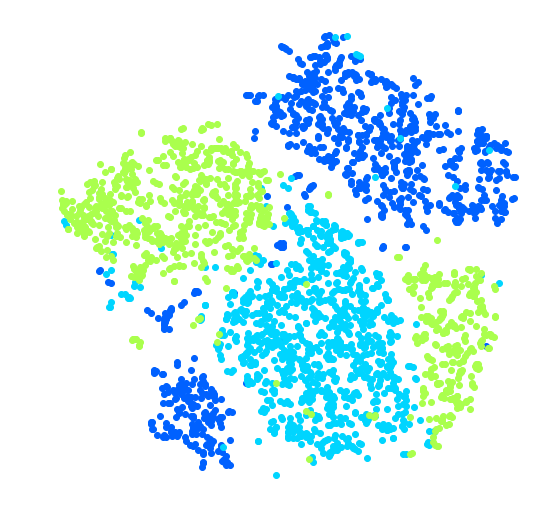

In [110]:
plt.figure(figsize=(9,9))
for digit in (2,3,5):
    plt.scatter(X_subset_reduced[y_subset==digit,0], X_subset_reduced[y_subset==digit,1], c = cmap(digit/9))
plt.axis("off")
plt.show()

Much better, now the clusters have far less overlap. But some 3s are all over the place. Plus, there are two distinct clusters of 2s, and also two distinct clusters of 5s. It would be nice if we could visualize a few digits from each cluster, to understand why this is the case. Let's do that now.

Exercise: Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits.

Let's create a plot_digits() function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples (plot_lle_digits, based on a different digit dataset).

In [112]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X,y, min_distance =0.05, images =None, figsize=(13,10)):
    #Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    #Now we can create the list of coordinates of the digits plotted so far.
    #we pretend that one is already plotted far away at the start, to
    #avoid 'if' statements in the loop below
    neighbors = np.array([[10.,10.]])
    #The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

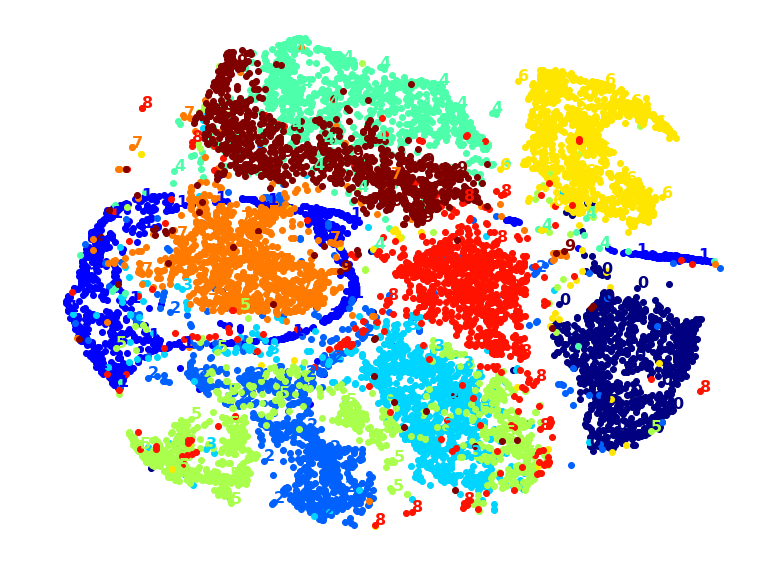

In [113]:
plot_digits(X_reduced,y)

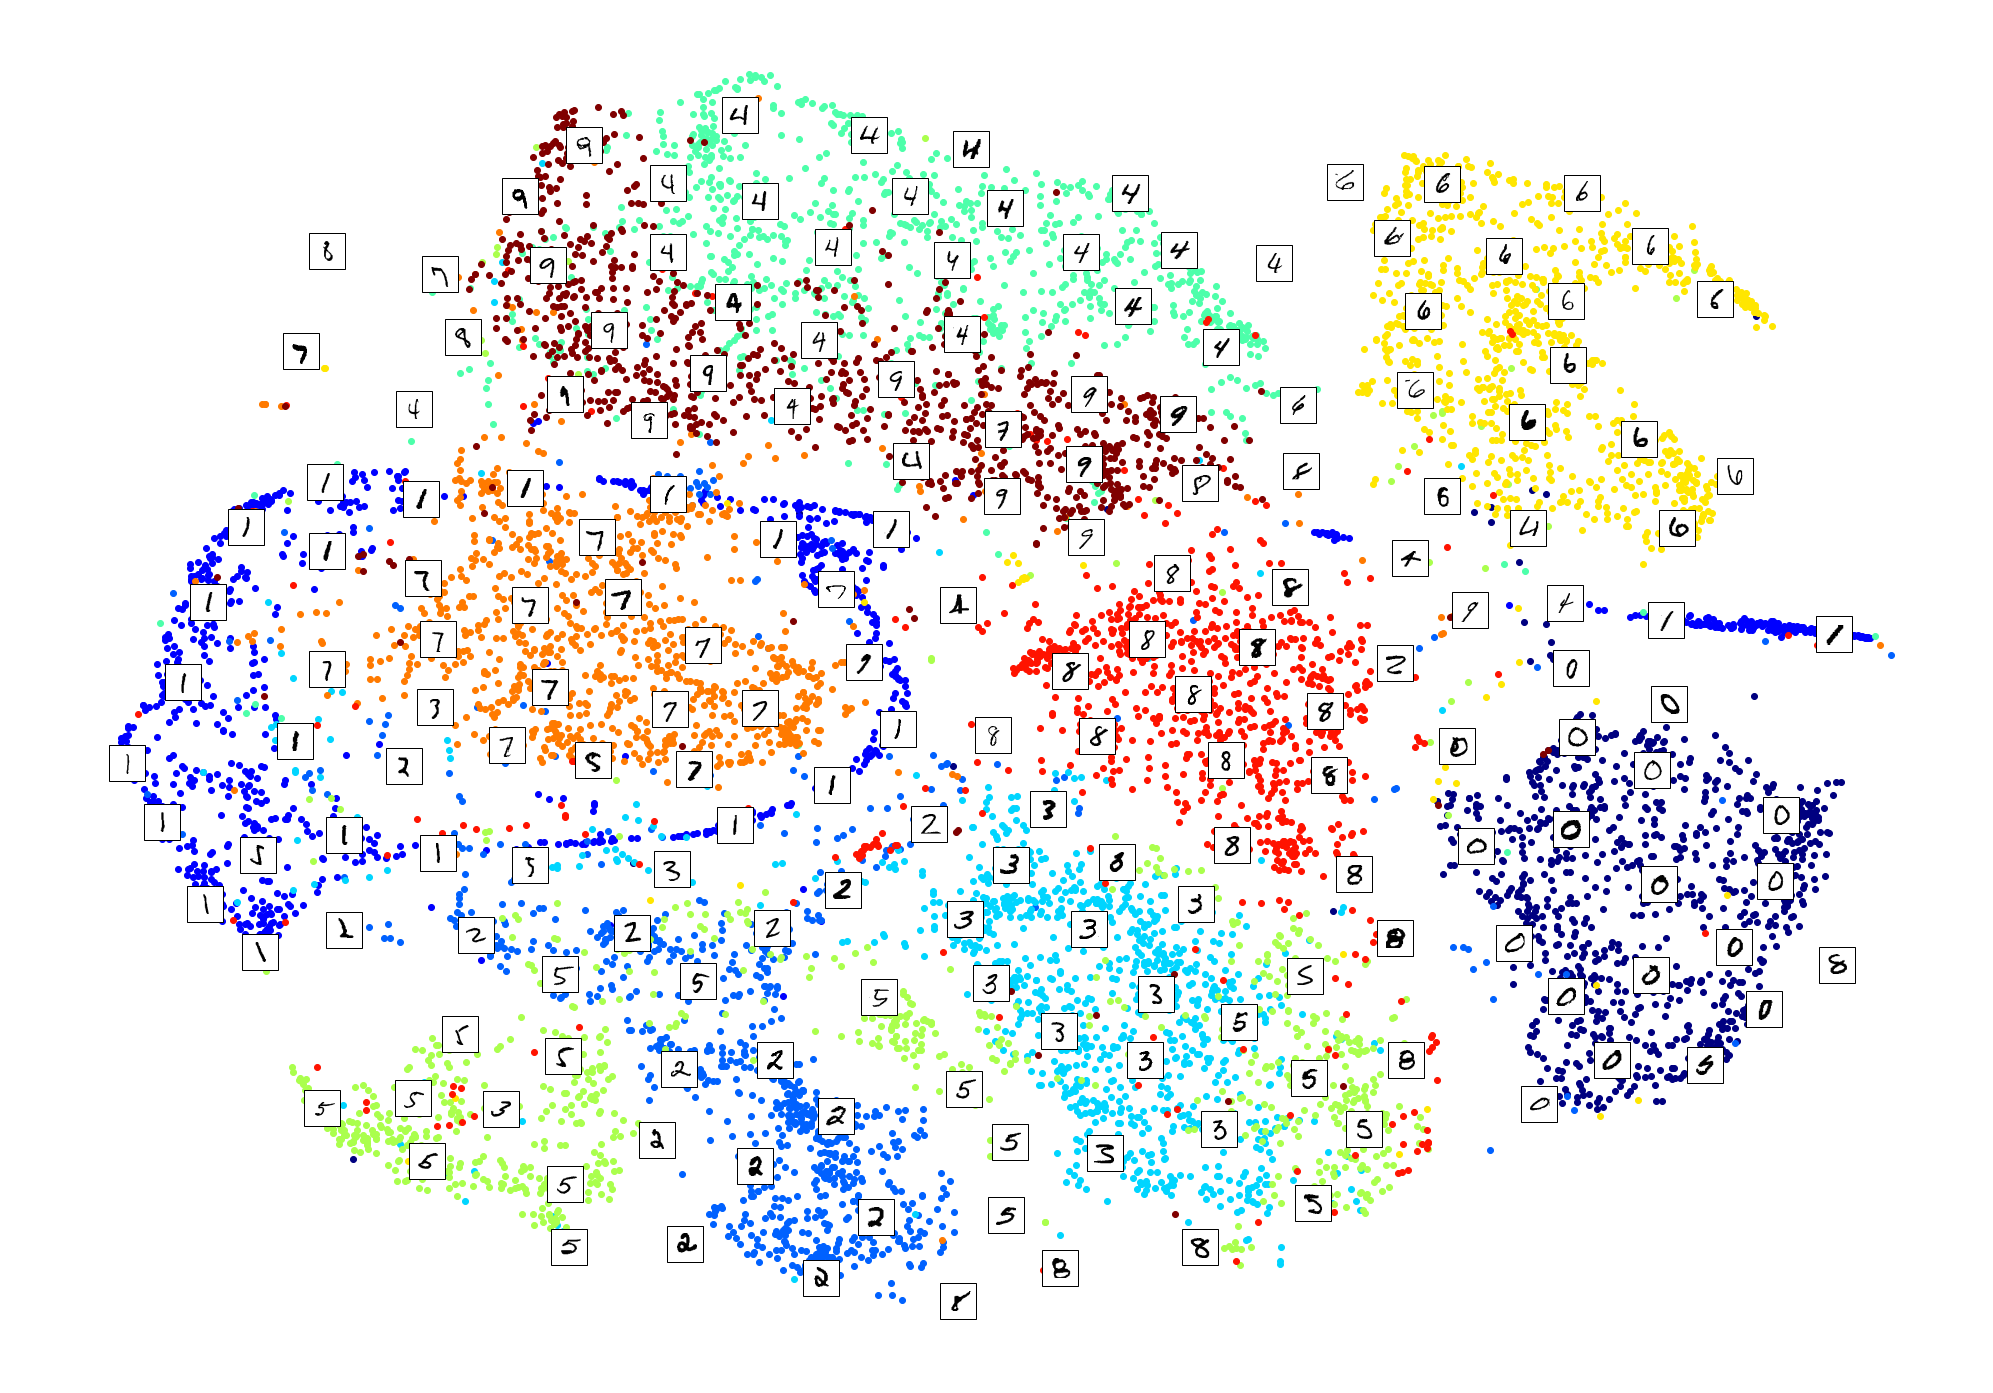

In [114]:
plot_digits(X_reduced,y, images = X, figsize=(35,25))

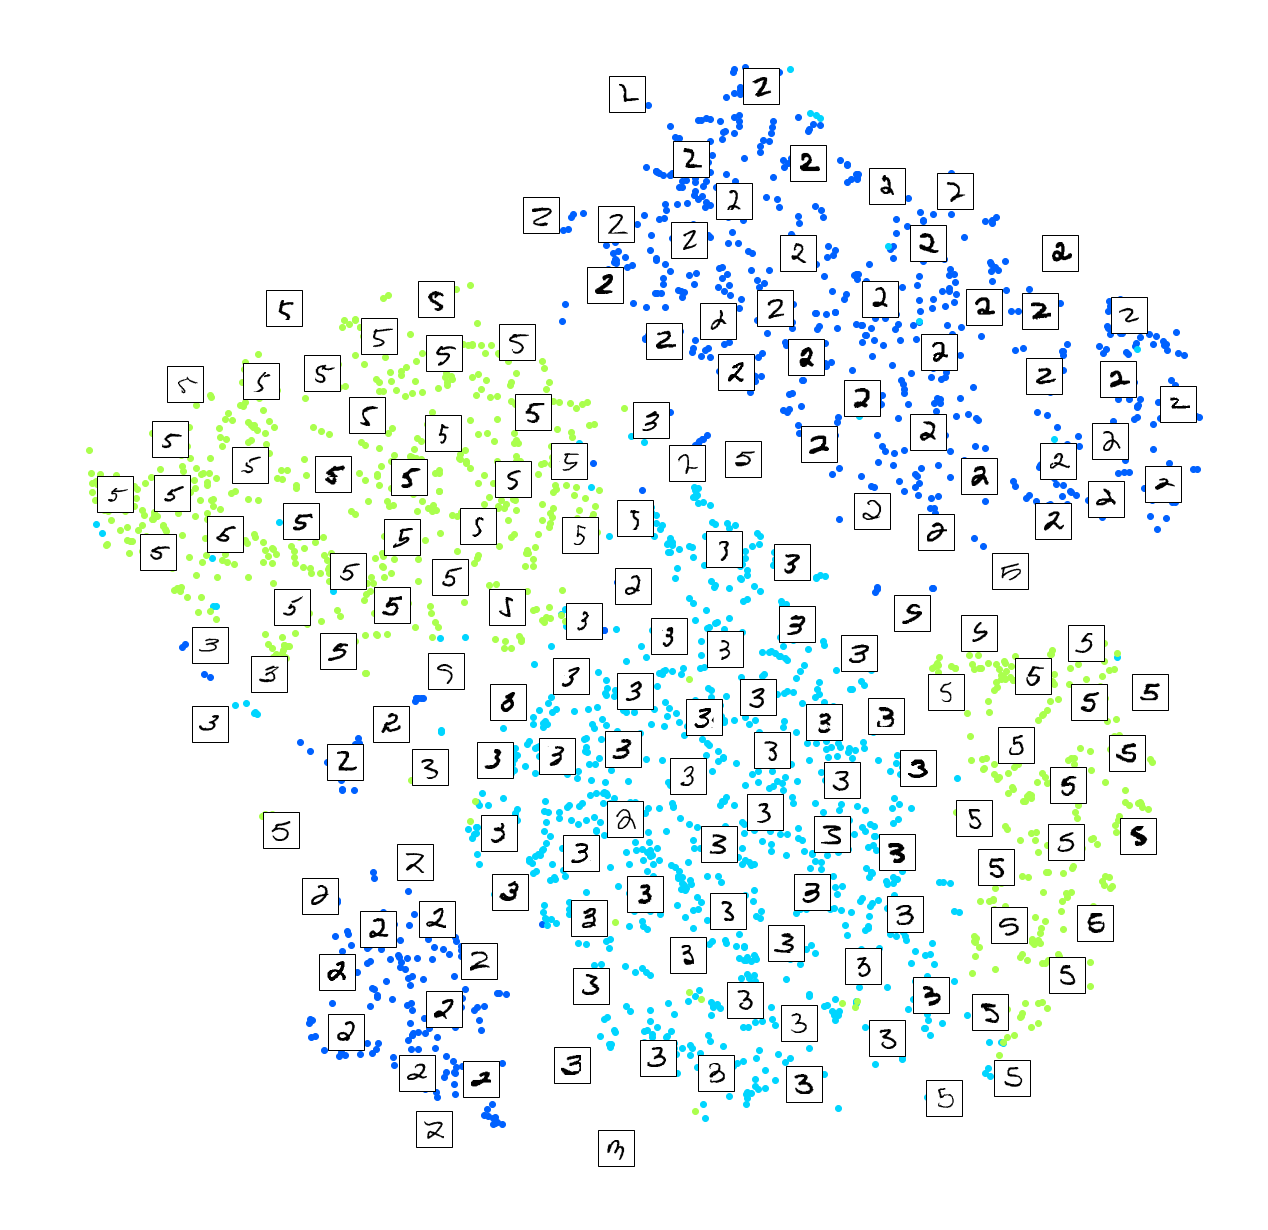

In [115]:
plot_digits(X_subset_reduced, y_subset, images = X_subset, figsize=(22,22))

Exercise: Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.
Let's start with PCA. We will also time how long it takes:

PCA took 0.427718s.


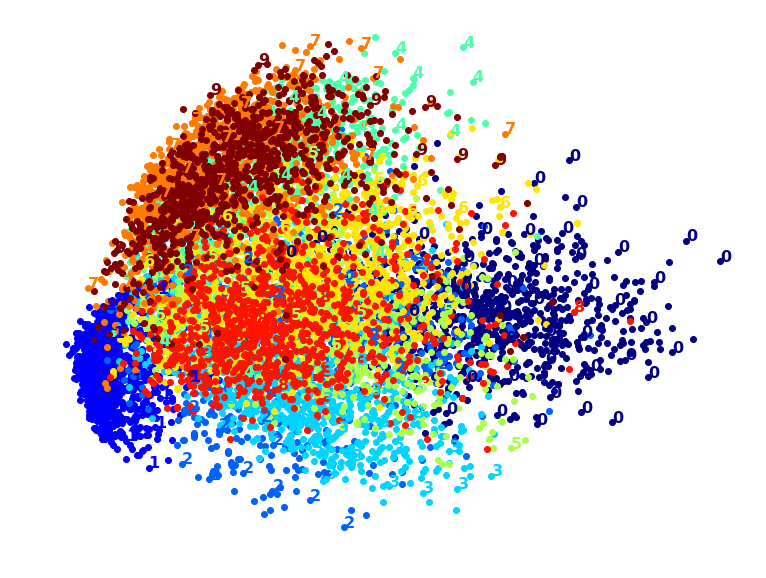

In [116]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 =time.time()
print("PCA took {:1f}s.".format(t1-t0))
plot_digits(X_pca_reduced, y)
plt.show()

Wow, PCA is blazingly fast! but although we do see a few clusters, there's way too much overlap, let's try LLE

LLE took 165.7s


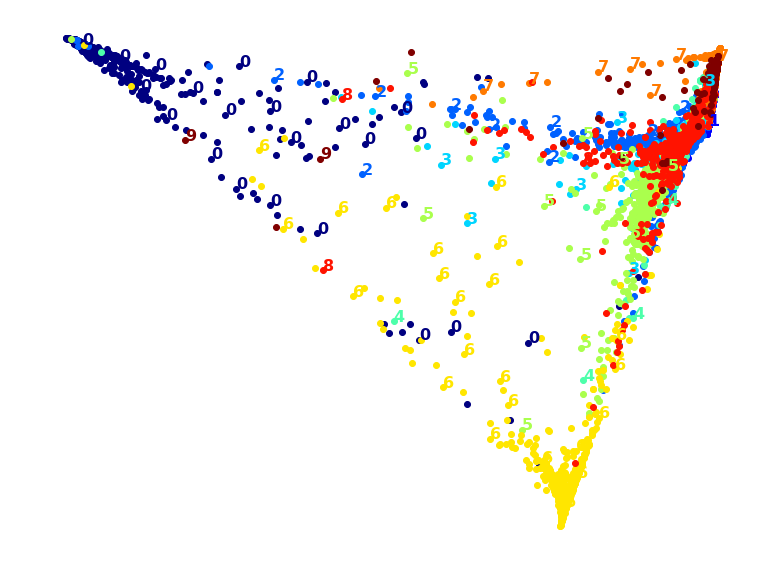

In [118]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components =2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s".format(t1-t0))
plot_digits(X_lle_reduced,y)
plt.show()

Tha took a while, and the result does not look good. Let's see what happens if we apply PCA first, preserving 95% of the variance:

PCA+LLE took 57.6s


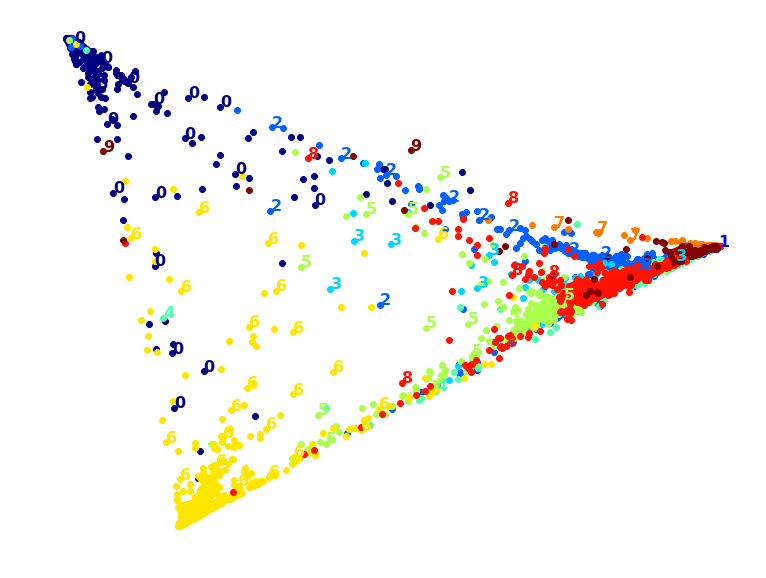

In [119]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
        ("pca", PCA(n_components=0.95, random_state=42)),
        ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])

t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s".format(t1-t0))
plot_digits(X_pca_lle_reduced, y)

plt.show()

The result is more or less the same, but this time it was almost 4x faster. Let's try MDS. it's much too long if we run it on 10000 instances, so let's just try 2000 for now

MDS took 168.797086s on just 2000 MNIST images instead of 10000).


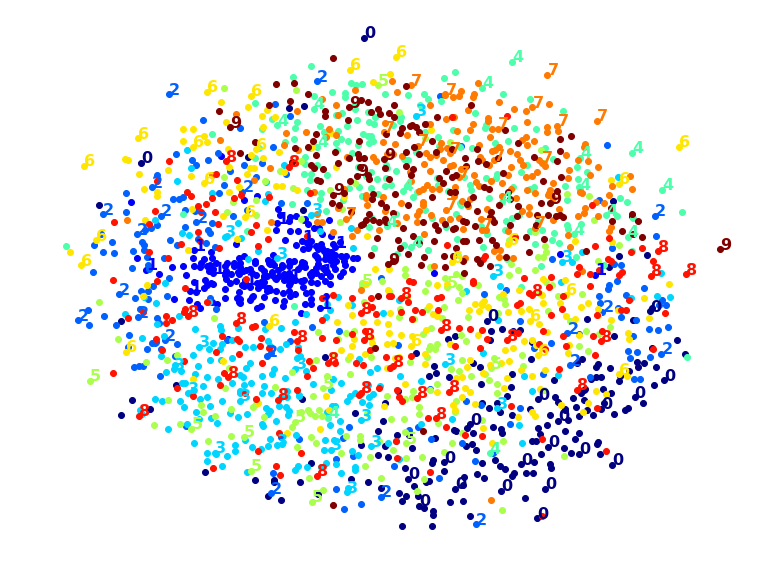

In [121]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:1f}s on just 2000 MNIST images instead of 10000).".format(t1-t0))
plot_digits(X_mds_reduced, y[:m])

plt.show()

all clusters overlap too much. let's try with PCA first

PCA+MDS took 170.4s on (2000 MNIST images).


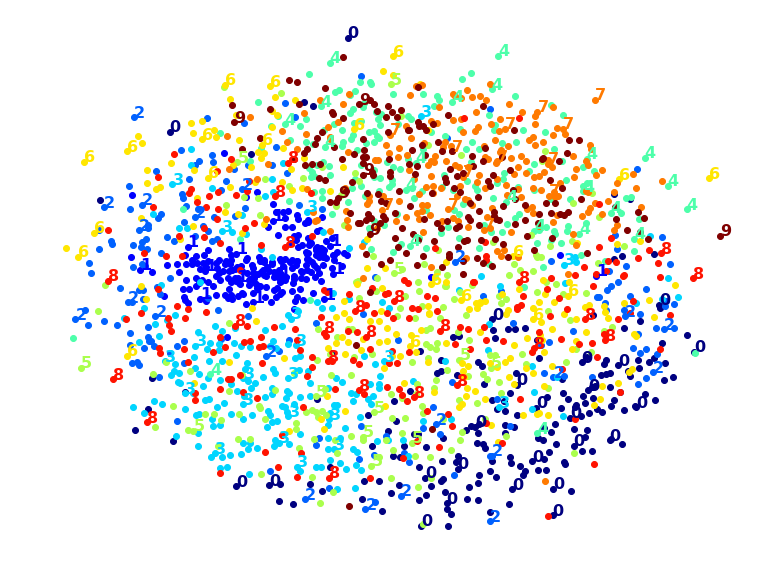

In [122]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
        ("pca", PCA(n_components=0.95, random_state=42)),
        ("mds", MDS(n_components=2, random_state=42))
])

t0=time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s on (2000 MNIST images).".format(t1-t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

Same result and no speedup: PCA did not help. Let's try LDA

/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA took 2.0s.


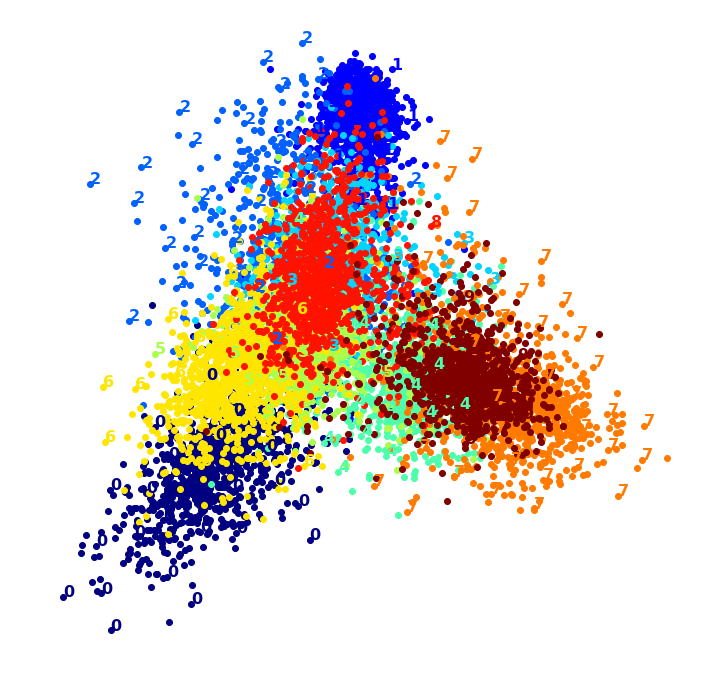

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components = 2).fit_transform(X,y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1-t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

This one is very fast, and it looks nice at first, until you realize that several clusters overlap severely.
Well, it's pretty clear that t-SNE won this little competition, wouldn't you agree? We did not time it, so let's do that now:

t-SNE took 364.8s.


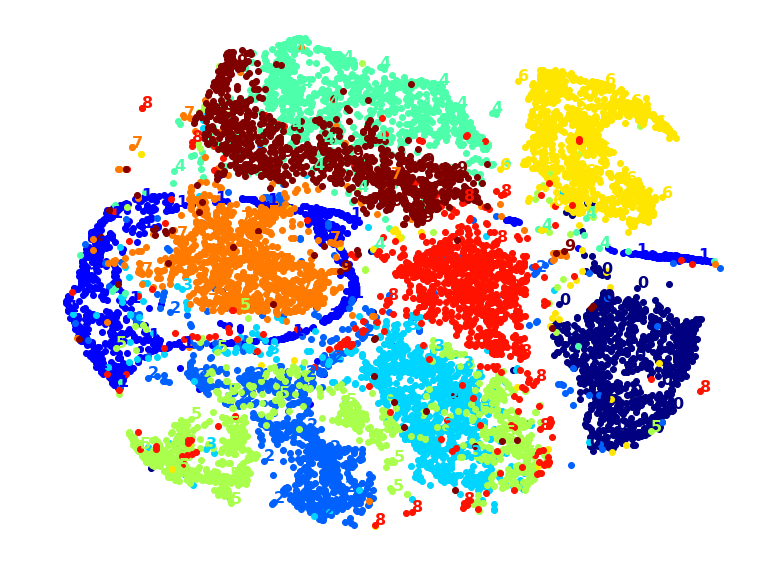

In [124]:
from sklearn.manifold import TSNE
t0 = time.time()
X_tsne_reduced=TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1-t0))
plot_digits(X_tsne_reduced,y)
plt.show()

It's twice slower than LLE, but still much faster than MDS, and the result looks great. Let's see if a bit of PCA can speed it up:

PCA+t-SNE took 310.3s.


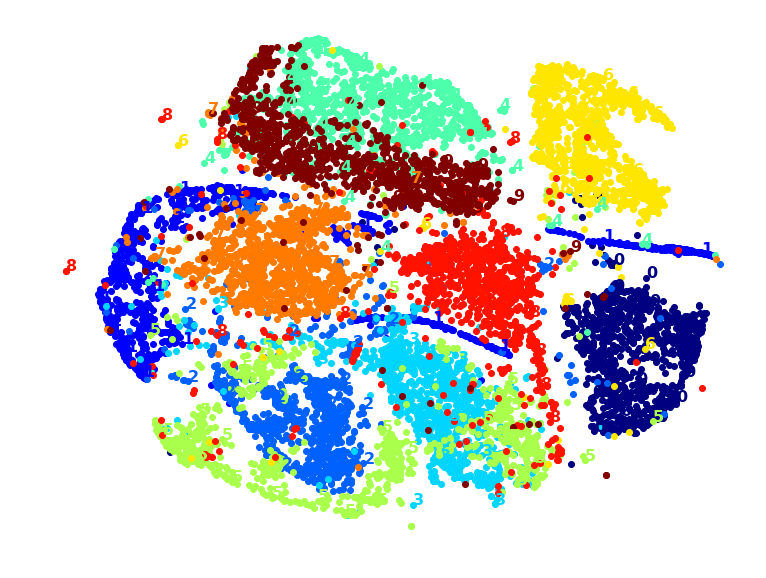

In [125]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced =pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1-t0))
plot_digits(X_pca_tsne_reduced,y)
plt.show()

PCA roughly gave us a 25% speedup, without damaging the result.